In [68]:
pwd

'/Users/oguzhanbekar/OneDrive/Spiced/work/07_week'

In [1]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (12, 6)
x = np.linspace(0, 10, 101)

In [8]:
df = sns.load_dataset('flights')

In [9]:
df.reset_index(inplace=True)
df.rename(columns={'index':'timestep'}, inplace=True)

In [14]:
df.set_index(pd.to_datetime(df.year.astype(str) + '/' + df.month.astype(str) + '/01'), inplace=True)


In [15]:
df.head()

,timestep,year,month,passengers
1949-01-01,0,1949,Jan,112
1949-02-01,1,1949,Feb,118
1949-03-01,2,1949,Mar,132
1949-04-01,3,1949,Apr,129
1949-05-01,4,1949,May,121


<AxesSubplot:ylabel='passengers'>

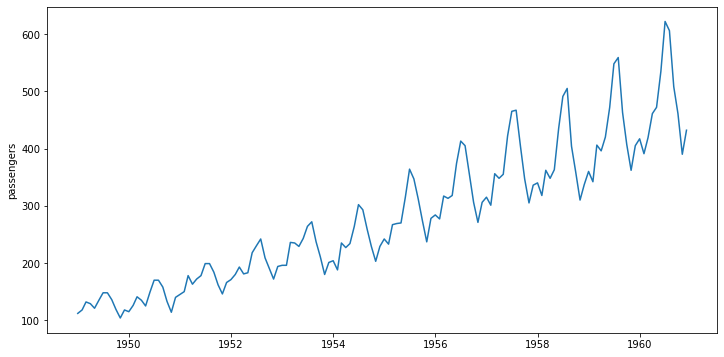

In [21]:
sns.lineplot(data = df.passengers)

In [34]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']] 
y = df['passengers']
m.fit(X, y)

#We want to fit a linear function of the timestep to our data

LinearRegression()

<AxesSubplot:ylabel='passengers'>

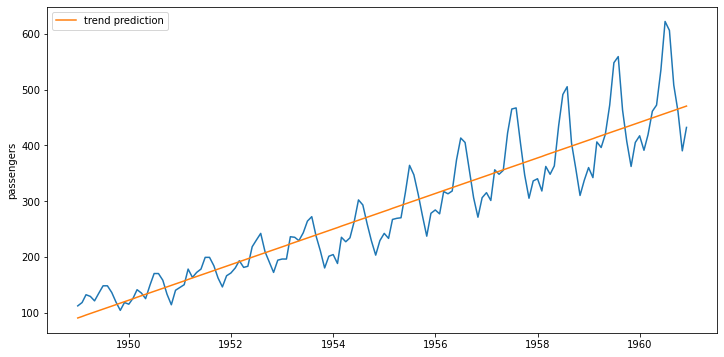

In [35]:
sns.lineplot(data=df.passengers)
sns.lineplot(x=df.index, y=m.predict(X), label='trend prediction')

In [36]:
seasonal_dummies = pd.get_dummies(df.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df.index)

flights = df.join(seasonal_dummies)


In [47]:
flights.drop(columns=['year','month','year'],inplace=True)


In [53]:
m2 = LinearRegression()
x2 = flights.loc[:, flights.columns != 'passengers']
y2 = flights['passengers']
m2.fit(x2,y2)

LinearRegression()

<AxesSubplot:ylabel='passengers'>

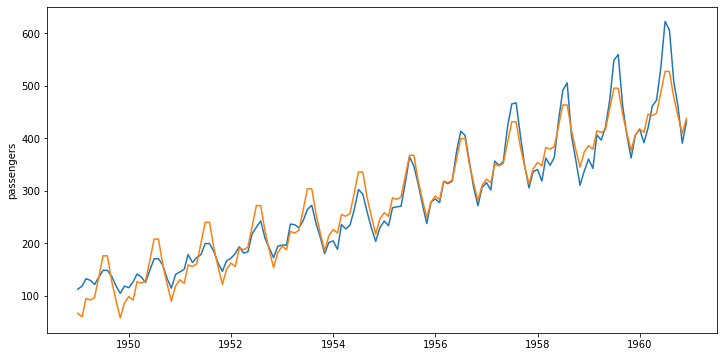

In [62]:
sns.lineplot(data=flights.passengers)
sns.lineplot(x=flights.index,y=m2.predict(x2))

In [63]:
flights['seasonal'] = m2.predict(x2)

In [65]:
flights['remainder'] = flights['passengers']-flights['seasonal']

In [66]:
flights.head()

,timestep,passengers,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,seasonal,remainder
1949-01-01,0,112,0,0,0,0,0,0,0,0,0,0,0,66.168269,45.831731
1949-02-01,1,118,1,0,0,0,0,0,0,0,0,0,0,59.418269,58.581731
1949-03-01,2,132,0,1,0,0,0,0,0,0,0,0,0,94.584936,37.415064
1949-04-01,3,129,0,0,1,0,0,0,0,0,0,0,0,91.501603,37.498397
1949-05-01,4,121,0,0,0,1,0,0,0,0,0,0,0,96.251603,24.748397


<AxesSubplot:ylabel='remainder'>

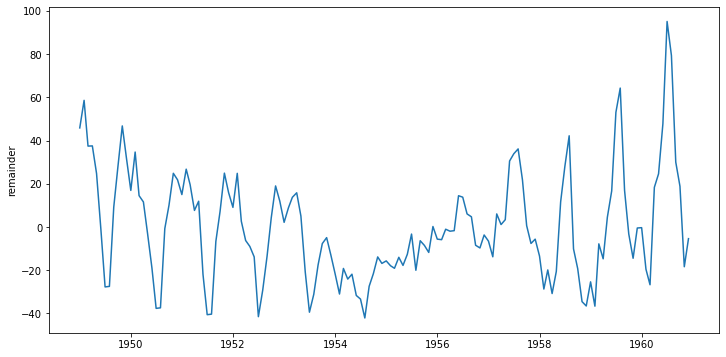

In [67]:
sns.lineplot(data=flights.remainder)

In [ ]:
|